In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

output_directory = '/home/marco/DataspellProjects/thesis/output/pls/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette(palette)

df = pd.read_csv('../../data/ST002498_z.csv')
df.describe()

,Age,Height,Weight,S-1-pyrroline-5-carboxylate,spermidine,1-methylnicotinamide,3-phosphoglycerate,"5,6-dihydrothymine",hypoxanthine,quinolinate,...,X-25519,X-25520,X-25790,X-25810,X-25828,X-25855,X-25948,X-25957,X-26097,Diagnosis
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,...,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.0000
mean,0.007425,0.010053,0.000285,0.011043,-0.008243,-0.007791,-0.010447,0.017833,-0.018459,-0.003517,...,-0.006615,-0.004873,-0.007584,0.000437,0.015021,-0.006455,-0.008275,-0.013349,-0.003308,0.5000
std,0.992131,0.967925,0.986467,1.008773,0.964372,0.964043,0.970150,0.981421,0.980179,0.969777,...,0.976524,0.971150,0.964506,0.969813,0.984631,0.964650,0.964612,0.974690,0.971573,0.5004
min,-3.677439,-10.675699,-5.417313,-1.998392,-0.540645,-0.219073,-1.291631,-4.367928,-1.453987,-0.868538,...,-1.220973,-0.857353,-0.425937,-0.358053,-3.294444,-0.721937,-0.536808,-1.754904,-2.530248,0.0000
25%,-0.657136,-0.205737,-0.578473,-0.708038,-0.215238,-0.163752,-0.462960,-0.615635,-0.686302,-0.361391,...,-0.470149,-0.456672,-0.203076,-0.279605,-0.642269,-0.220701,-0.207818,-0.359027,-0.459041,0.0000
50%,0.039857,0.016030,-0.106391,-0.151390,-0.109196,-0.139170,-0.226522,-0.037622,-0.268016,-0.198360,...,-0.224252,-0.268090,-0.114908,-0.215108,0.100297,-0.104594,-0.133198,-0.022854,-0.143522,0.5000
75%,0.620684,0.325935,0.483711,0.558186,0.004333,-0.097251,0.110589,0.570203,0.446424,0.090995,...,0.127872,0.120560,-0.001271,-0.030181,0.698217,0.011532,-0.019935,0.309724,0.286015,1.0000
max,2.363167,1.565556,3.876800,4.389207,20.596352,13.796128,8.476954,3.702734,5.256337,15.695124,...,10.537399,13.784214,18.979855,19.947659,4.833957,16.115889,16.932171,11.767541,10.014955,1.0000


Performing PLSDA on the dataset using the roc_auc scoring metric and 10-fold cross validation.

In [40]:
from sklearn.metrics import roc_auc_score
import numpy as np

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']


In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


components = np.arange(1,20)
scores = []
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for i in components:
    kscores = []
    #10-fold cross validation
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #fitting the model
        knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='manhattan', n_jobs=-1)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        kscores.append(roc_auc_score(y_test, y_pred))
        
    scores.append(kscores)

#getting scores distribution for each number of components
scores = np.array(scores)
score_mean = np.mean(scores, axis=1)
score_std = np.std(scores, axis=1)
score_25 = np.quantile(scores, 0.25, axis=1)
score_75 = np.quantile(scores, 0.75, axis=1)


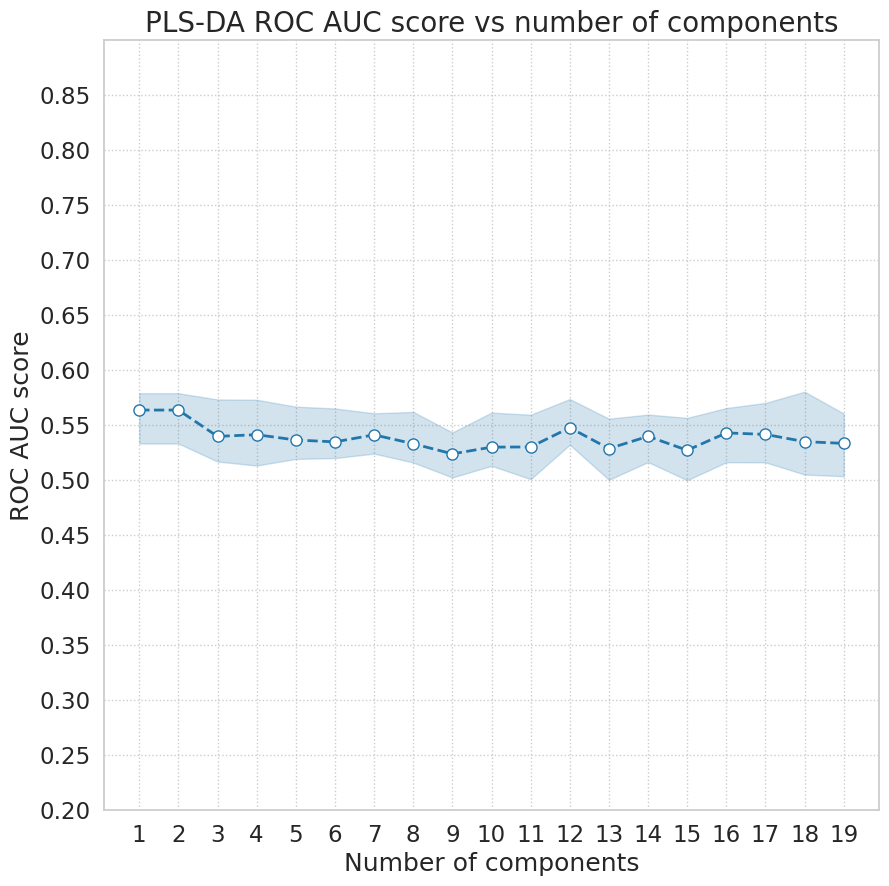

In [42]:
plt.figure(figsize=(10, 10))

# boxplot showing the distribution of the scores using line and markers
plt.plot(components, score_mean, color=palette[0], marker='o', markersize=8, linestyle='--', markeredgecolor=palette[0], markerfacecolor='white', linewidth=2)
plt.fill_between(components, score_25, score_75, color=palette[0], alpha=0.2)

# y axis limits
plt.ylim(0.2, 0.9)

# show plot grid
plt.xticks(components)
plt.yticks(np.arange(0.2, 0.9, 0.05))
plt.grid(True, linestyle=':', linewidth=1)
plt.xlabel('Number of components')
plt.ylabel('ROC AUC score')
plt.title('PLS-DA ROC AUC score vs number of components', fontsize=20)
plt.savefig(output_directory + 'PLS-DA_number_of_components.png', dpi=300)
